# Comments classification: offensive/non-offensive

1. Import Dataset

In [1]:
import pandas as pd
df = pd.read_csv('Dataset/CVMAD_04.csv', encoding='UTF-8')### if it doesn't work try 'utf-8-sig'
df.head()

,content,decision
0,یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهت...,1
1,یاک مطلقها علاش کیحاسبها داب,1
2,یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعص...,1
3,يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح الت...,0
4,يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب ا...,0


In [ ]:
import seaborn as sns # visulization
sns.countplot(x=df['decision'])

2. Data pre-processing

In [3]:
import re
def removeWeirdChars(text):
    weirdPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weirdPatterns.sub(r'', text)

In [4]:
df.content = [removeWeirdChars(d) for d in df.content]

In [5]:
df.content[0:20]

0     یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهت...
1                          یاک مطلقها علاش کیحاسبها داب
2     یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعص...
3     يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح الت...
4     يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب ا...
5                                              يوسف رجل
6         يوسف الزروالي هو لي دخلو لي جمعية شباب الملكي
7                         يوزع شكون فيق سكيزو من السبات
8       يوتيب تسبب ليا بمرض نفسي وليت كنخاف ومرضت نفسيا
9     يهدر واش تتوقع منو وجاية ملمريخ نتا واش قودك ي...
10                                          يهدر كي نسا
11    يهدر بحال النسا سبحان الله يا حبيبتي ه و اليد ...
12                                   يه الحاجة طامو يه؟
13                                       ينقجو و ينحقزو
14    ينعل تحية ليك من طانطان هاد شعب فيهم غا هضرة ت...
15            ينعل بو زواج الى كان هكا نبقاو بايرات حسن
16                    ينصاب يا لقمار يا سكاير طالب سيدك
17                        ينتقم للمستقبل ويريد ح

In [6]:
import string
df.content = [cmt.translate(str.maketrans('', '', string.punctuation)) for cmt in df.content]

In [8]:
df.content[0:20]

0     یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهت...
1                          یاک مطلقها علاش کیحاسبها داب
2     یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعص...
3     يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح الت...
4     يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب ا...
5                                              يوسف رجل
6         يوسف الزروالي هو لي دخلو لي جمعية شباب الملكي
7                         يوزع شكون فيق سكيزو من السبات
8       يوتيب تسبب ليا بمرض نفسي وليت كنخاف ومرضت نفسيا
9     يهدر واش تتوقع منو وجاية ملمريخ نتا واش قودك ي...
10                                          يهدر كي نسا
11    يهدر بحال النسا سبحان الله يا حبيبتي ه و اليد ...
12                                   يه الحاجة طامو يه؟
13                                       ينقجو و ينحقزو
14    ينعل تحية ليك من طانطان هاد شعب فيهم غا هضرة ت...
15            ينعل بو زواج الى كان هكا نبقاو بايرات حسن
16                    ينصاب يا لقمار يا سكاير طالب سيدك
17                        ينتقم للمستقبل ويريد ح

3. Data Encoding

In [26]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras import models 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
lens = df.content.str.len()
lens.mean(), lens.std(), lens.max()

(72.38460869565218, 88.66973653460076, 2352)

In [7]:
max_length = df.content.str.len().max()
print(max_length)

2352


In [ ]:
lens.hist()

Word Embedding

In [12]:
from keras.preprocessing.text import Tokenizer

text= df.content

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))

#Pad sequences
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 60
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

Number of Unique Tokens 75033


In [9]:
word_embeddings['علاش']

array([-0.04573694,  0.10975436, -0.54744524,  0.10996349,  0.20633675,
        0.90674895,  0.11491557,  0.72445756,  0.58139473, -0.2946483 ,
       -0.7712647 , -0.17335273,  0.33888417, -0.20815212,  0.46175632,
        0.38756797,  0.28463918, -0.03309639, -0.08293769, -0.13326049,
       -0.58587915, -0.48430493, -0.16314602, -0.38404787,  0.08127248,
       -0.8705088 ,  0.33157548,  0.3544283 ,  0.5581337 ,  0.08885915,
       -1.1427025 ,  0.92506343, -0.09592154,  0.5934387 ,  0.3629863 ,
       -0.21132165,  0.30229187,  0.16288331, -0.31264427, -0.04881828,
       -0.08142379, -1.4429231 , -0.66444516, -1.4426838 , -1.0821352 ,
       -0.05486058,  0.8075012 ,  0.6802713 ,  1.0687793 , -1.7807748 ,
       -1.0383372 ,  1.5321866 , -0.8323125 ,  0.3871929 , -0.6774203 ,
        1.2722178 ,  0.6946758 , -0.8461339 ,  1.0099423 ,  0.37826127,
        0.580605  , -0.18887214, -0.8269939 ,  0.958509  ,  0.4126865 ,
       -2.1811097 ,  1.2467979 , -0.53286076, -1.0175996 , -1.90

In [13]:
#Reshape dataset
import numpy as np
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]

In [14]:
data.shape

(23000, 60)

In [15]:
embeddings_index = {}
f = open('ma_model_cbow_mix.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Total %s word vectors in MA CBOW model 300d.' % len(embeddings_index))

Total 82906 word vectors in MA CBOW model 300d.


In [18]:
#Embedding Matrix
EMBEDDING_DIM = 300
embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
print('Shape of Data Tensor:', embedding_matrix.shape)

Shape of Data Tensor: (75034, 300)


4. Modeling

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, Embedding, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim = embedding_matrix.shape[1],
                    input_length=MAX_SEQUENCE_LENGTH,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(LSTM(128, dropout=0.3, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(64, dropout=0.3, activation='relu', return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [59]:
model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim = embedding_matrix.shape[1],
                    input_length=MAX_SEQUENCE_LENGTH,
                    weights=[embedding_matrix],
                    trainable=False))
model.add(GRU(128, dropout=0.3, activation='relu', return_sequences=True))
model.add(BatchNormalization())
model.add(GRU(64, dropout=0.3, activation='relu', return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [60]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['acc'])

In [71]:
inp = Input(shape=(MAX_SEQUENCE_LENGTH))
x = Embedding(input_dim=embedding_matrix.shape[0],
              output_dim=embedding_matrix.shape[1],
              weights=[embedding_matrix],
              input_length = MAX_SEQUENCE_LENGTH,
              trainable=False)(inp)
x = Bidirectional(LSTM(128, dropout=0.3, activation="relu", return_sequences = True))(x) 
x = BatchNormalization()(x)
x = Bidirectional(LSTM(64, dropout=0.3, activation="relu", return_sequences = False))(x)
x = BatchNormalization()(x)
x = Dense(64, activation="sigmoid")(x)
x = BatchNormalization()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=5000,
    decay_rate=0.05)
#opt = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['acc'])

In [28]:
embedding_matrix.shape

(75034, 300)

5. Data splitting

In [29]:
X = data
y = df.decision

In [30]:
X[0:3]

array([[ 3652, 21400,  1002,  4520,  1925,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [   19,  4087,     2,    26,  2100,     9, 10337, 26427,    47,
         1296,    77,    97,  1329, 26428,   241,     2,    14, 26429,
         8020,    47,   285,    56,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0],
       [  107,    42,     8,    70,     9,   1

In [31]:
y[0:3]

0    1
1    1
2    1
Name: decision, dtype: int64

In [32]:
""" Sckaling and Splitting the dataset into training, validation and test sets """
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_sacaled=scaler.fit_transform(X)

train_X, temp_X, train_y, temp_y = train_test_split(X_sacaled, y, random_state=50, test_size=0.3)

val_X, test_X, val_y, test_y = train_test_split(temp_X, temp_y, random_state=50, test_size=0.5)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [103]:
train_X[0:3]

array([[-0.43347176, -0.47026806, -0.42547837, -0.50554337, -0.05374429,
        -0.28953975, -0.41113584, -0.39041364,  1.21574264, -0.35744544,
        -0.34400377, -0.32721317, -0.3160984 , -0.29413118, -0.28462509,
        -0.27100943, -0.25848987, -0.24458308, -0.23633566, -0.2275233 ,
        -0.2177029 , -0.20975404, -0.2047902 , -0.19281332, -0.193013  ,
        -0.1826344 , -0.18070872, -0.16945931, -0.16377389, -0.16415078,
        -0.15803773, -0.152939  , -0.14494784, -0.14039346, -0.13745062,
        -0.12934839, -0.12751047, -0.12323784, -0.12049472, -0.1222893 ,
        -0.11633793, -0.11251934, -0.11169008, -0.10915887, -0.10636714,
        -0.1043945 , -0.10514416, -0.1055905 , -0.0981657 , -0.09372086,
        -0.08994072, -0.09122515, -0.08422031, -0.08920633, -0.08275944,
        -0.08287954, -0.08412545, -0.07987521, -0.07776635, -0.0878589 ],
       [-0.44940814, -0.51519638, -0.52274184,  0.14756055,  1.97567784,
        -0.45580202, -0.41497729, -0.4068492 , -0.

In [104]:
train_X.shape

(16100, 60)

In [105]:
train_y.shape

(16100,)

In [106]:
val_X.shape

(3450, 60)

In [107]:
val_y.shape

(3450,)

In [108]:
test_X.shape

(3450, 60)

In [123]:
test_y.shape

(3450,)

In [126]:
test_y.dtype

dtype('int64')

In [72]:
history = model.fit(train_X, train_y,
          epochs=5, 
          batch_size=32,
          validation_data=(val_X, val_y),
          verbose=1)

Epoch 1/5
504/504 [==============================] - 159s 305ms/step - loss: 0.7365 - acc: 0.4963 - val_loss: 0.7041 - val_acc: 0.4933
Epoch 2/5
504/504 [==============================] - 154s 306ms/step - loss: 0.7124 - acc: 0.4949 - val_loss: 0.6980 - val_acc: 0.5038
Epoch 3/5
504/504 [==============================] - 152s 302ms/step - loss: 0.7022 - acc: 0.4977 - val_loss: 0.6994 - val_acc: 0.4977
Epoch 4/5
504/504 [==============================] - 152s 302ms/step - loss: 0.7011 - acc: 0.5030 - val_loss: 0.6980 - val_acc: 0.4875
Epoch 5/5
504/504 [==============================] - 152s 302ms/step - loss: 0.7000 - acc: 0.4979 - val_loss: 0.6978 - val_acc: 0.5032


### Ploting the training and validation loss 

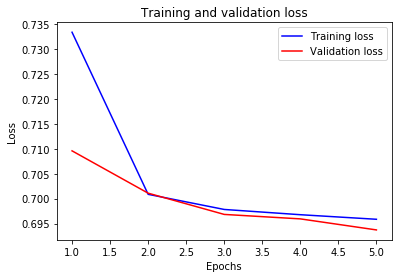

In [65]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [73]:
# Evaluate the model on the test data
print("Evaluate on test data")
results = model.evaluate(test_X, test_y, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
27/27 [==============================] - 7s 239ms/step - loss: 0.6962 - acc: 0.5035
test loss, test acc: [0.6961997747421265, 0.5034782886505127]


In [43]:
pred_y=[np.argmax(model.predict(test_X[i]))for i in range(0, len(test_X)-1)]

In [45]:
pred_y

[3,
 6,
 0,
 0,
 4,
 17,
 0,
 3,
 5,
 5,
 0,
 1,
 0,
 0,
 5,
 43,
 41,
 1,
 0,
 6,
 0,
 2,
 15,
 0,
 14,
 4,
 12,
 0,
 0,
 21,
 0,
 0,
 15,
 1,
 2,
 0,
 0,
 14,
 8,
 16,
 54,
 5,
 2,
 0,
 8,
 0,
 9,
 2,
 0,
 1,
 6,
 14,
 0,
 7,
 7,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 12,
 4,
 1,
 0,
 0,
 0,
 15,
 0,
 0,
 6,
 0,
 0,
 0,
 22,
 0,
 9,
 0,
 0,
 9,
 26,
 0,
 14,
 10,
 4,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 4,
 13,
 4,
 0,
 1,
 0,
 3,
 5,
 2,
 0,
 35,
 2,
 0,
 0,
 7,
 0,
 5,
 7,
 15,
 0,
 16,
 0,
 0,
 0,
 3,
 7,
 0,
 2,
 0,
 42,
 1,
 0,
 1,
 9,
 0,
 5,
 5,
 4,
 0,
 4,
 15,
 3,
 0,
 1,
 1,
 0,
 0,
 14,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 10,
 0,
 2,
 0,
 2,
 5,
 6,
 1,
 11,
 0,
 5,
 12,
 7,
 11,
 3,
 9,
 8,
 9,
 0,
 37,
 0,
 18,
 0,
 4,
 0,
 0,
 3,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 13,
 4,
 1,
 0,
 2,
 23,
 23,
 6,
 11,
 0,
 0,
 0,
 5,
 1,
 8,
 4,
 3,
 9,
 0,
 1,
 0,
 0,
 0,
 10,
 5,
 0,
 0,
 0,
 2,
 35,
 3,
 3,
 0,
 0,
 4,
 13,
 3,
 4,
 1,
 4,
 19,
 12,
 0,
 0,
 1,
 13,
 0,
 7,
 3,
 8,
 0,

In [74]:
pred_y_probs=model.predict(test_X)

In [75]:
#convert probs to binary values 0/1
pred_y = (pred_y_probs > 0.5).astype(np.int)

In [57]:
pred_y

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [78]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y, digits=4))

              precision    recall  f1-score   support

           0     0.5029    0.4962    0.4996      1723
           1     0.5040    0.5107    0.5073      1727

   micro avg     0.5035    0.5035    0.5035      3450
   macro avg     0.5035    0.5035    0.5034      3450
weighted avg     0.5035    0.5035    0.5035      3450



In [113]:
# Generate predictions (probabilities -- the output of the last layer) on new data 
print("Generate predictions for 3 samples")
predictions = model.predict(test_X[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
predictions shape: (3, 60, 1)


In [114]:
data_test=[]
data_test=df.content[20000:]

In [129]:
print(data_test[20050])
print("Prediction: " , np.argmax(model.predict(test_X[50])))
print("Real Value: ", test_y.iloc[50])

Hh 9alak nssalo fih
Prediction:  1
Real Value:  0


In [116]:
print(data_test[22000])
print("Prediction: " , model.predict(test_X[2000]).flatten())

Asfi hayawanato lmaghreb
Prediction:  [0.5438336  0.5438336  0.5438336  0.5438336  0.44186643 0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336
 0.5438336  0.5438336  0.5438336  0.5438336  0.5438336  0.5438336 ]


In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, pred_y)
cnf_matrix